In [41]:
import geopandas as gp
from geocube.api.core import make_geocube
from pathlib import Path
import xarray as xr
import numpy as np

def taril_to_tif(filename):
    data = gp.read_file(filename).to_crs('EPSG:32647')
    data['geometry'] =data.geometry.buffer(0.25)
    data['trail']=1
    out_grid = make_geocube(
        vector_data=data,
        measurements=["trail"],
        resolution=(-0.05, 0.05),
        fill=-9999)
    out_grid['trail'].rio.to_raster(filename.with_suffix('.tif'))
    return out_grid

files = Path('/home/mor582/data/2020_11_006').rglob('*_trails.shp')
trails =[]
for file in files:
    trails.append(taril_to_tif(file))

In [9]:
trail = trails[0]

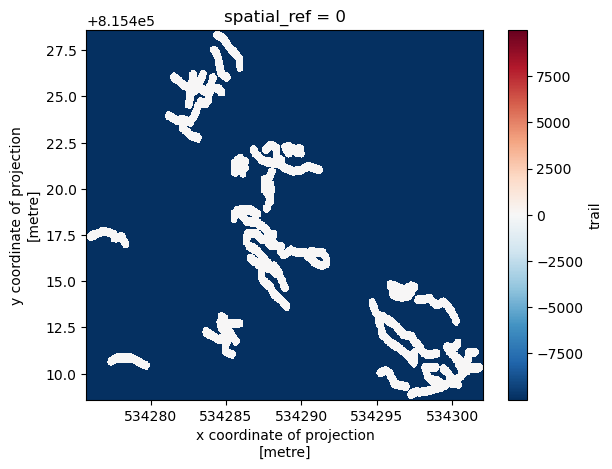

In [10]:
trail['trail'].plot()

In [76]:
easting =np.arange(np.min(eastings) -np.min(eastings) % gridsize,np.max(eastings) -np.max(eastings) % gridsize,gridsize)
        northing=np.arange(np.min(northings) -np.min(northings) % gridsize,np.max(northings) -np.max(northings) % gridsize,gridsize)
        xi,yi = np.meshgrid(easting,northing)

In [26]:

#fill the array
trail['trail'] =trail['trail'].where(trail['trail']>0).fillna(0)

In [120]:
np.ceil(4.4)

5.0

In [168]:
cell_size=np.abs(trail.x.diff(dim='x').mean()*trail.y.diff(dim='y').mean())
cell_size
binning = 1
xbin = np.arange(np.floor(trail.x.min())-binning*2,np.ceil(trail.x.max())+binning,binning)
ybin = np.arange(np.floor(trail.y.min())-binning,np.ceil(trail.y.max())+binning,binning)

In [169]:
heat =trail.groupby_bins('x',bins=xbin).sum().groupby_bins('y',bins=ybin).sum().rename({'y_bins':'y','x_bins':'x'})
heat

<xarray.Dataset> Size: 6kB
Dimensions:      (x: 30, y: 22)
Coordinates:
  * x            (x) object 240B (534273.0, 534274.0] ... (534302.0, 534303.0]
  * y            (y) object 176B (815407.0, 815408.0] ... (815428.0, 815429.0]
    spatial_ref  int64 8B 0
Data variables:
    trail        (y, x) float64 5kB nan nan nan nan nan ... 0.0 0.0 0.0 0.0 0.0

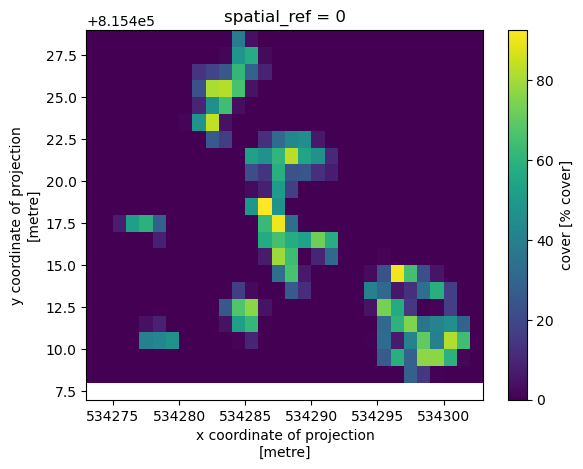

In [170]:
heat['cover']=(heat['trail']/((binning*binning)/cell_size))*100
heat['cover'].attrs['units']='% cover'
heat['cover'].plot()

In [171]:
heat.coords['x']=xbin[1:]
heat.coords['y']=ybin[1:]
heat.coords['x'] = heat.coords['x']-binning/2
heat.coords['y'] = heat.coords['y']-binning/2
heat['cover'].where(heat['cover']>0).rio.to_raster('trailheat.tif')

In [172]:
heat.coords['y']

<xarray.DataArray 'y' (y: 22)> Size: 176B
array([815407.5, 815408.5, 815409.5, 815410.5, 815411.5, 815412.5, 815413.5,
       815414.5, 815415.5, 815416.5, 815417.5, 815418.5, 815419.5, 815420.5,
       815421.5, 815422.5, 815423.5, 815424.5, 815425.5, 815426.5, 815427.5,
       815428.5])
Coordinates:
    spatial_ref  int64 8B 0
  * y            (y) float64 176B 8.154e+05 8.154e+05 ... 8.154e+05 8.154e+05

In [173]:
heat['cover']

<xarray.DataArray 'cover' (y: 22, x: 30)> Size: 5kB
array([[  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , 27.75, 14.5 ,  0.5 ,
         0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  , 26.5 , 58.25, 28.5 , 76.75, 76.25,
        59.25,  1.25,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  , 39.75, 42.5 , 47.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.75,  9.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.5 , 32.  ,  6.75, 41.  , 69.75, 39.75,
        81.5 , 64.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  3.75,  8.5 ,  0.  ,  0.  ,  0.  ,
         0.  ,  4.  , 51.75, 61.75,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  , 31.  , 59.5 , 74.75, 35.75, 41.25,
        45.75, 29.  ,  0.  ],
...
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.25,  9.25,
        46.  , 64.  ,  3.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , 22.5 ,
        80.75, 82.25, 65.75,  4.5 ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , 14.  ,
        18.75, 25.25, 61.25, 28.75,  8.75,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  1.25, 48.75, 57.  ,  2.5 ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  , 38.  ,  3.75,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ]])
Coordinates:
    spatial_ref  int64 8B 0
  * x            (x) float64 240B 5.343e+05 5.343e+05 ... 5.343e+05 5.343e+05
  * y            (y) float64 176B 8.154e+05 8.154e+05 ... 8.154e+05 8.154e+05
Attributes:
    units:    % cover